In [2]:
from matplotlib import pyplot as plt

In [3]:
import os
import skimage

In [10]:
input_dir = "/Users/rpezoa/HER2_images_pixel_segmentation/imgs/"
target_dir = "/Users/rpezoa/HER2_images_pixel_segmentation/labels/"
img_size = (200, 200)
num_classes = 1
batch_size = 32

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 225
/Users/rpezoa/HER2_images_pixel_segmentation/imgs/1+_20_0_200_0_200.png | /Users/rpezoa/HER2_images_pixel_segmentation/labels/1+_20_mask_0_200_0_200.png
/Users/rpezoa/HER2_images_pixel_segmentation/imgs/1+_20_0_200_200_400.png | /Users/rpezoa/HER2_images_pixel_segmentation/labels/1+_20_mask_0_200_200_400.png
/Users/rpezoa/HER2_images_pixel_segmentation/imgs/1+_20_0_200_400_600.png | /Users/rpezoa/HER2_images_pixel_segmentation/labels/1+_20_mask_0_200_400_600.png
/Users/rpezoa/HER2_images_pixel_segmentation/imgs/1+_20_0_200_600_800.png | /Users/rpezoa/HER2_images_pixel_segmentation/labels/1+_20_mask_0_200_600_800.png
/Users/rpezoa/HER2_images_pixel_segmentation/imgs/1+_20_0_200_800_1000.png | /Users/rpezoa/HER2_images_pixel_segmentation/labels/1+_20_mask_0_200_800_1000.png
/Users/rpezoa/HER2_images_pixel_segmentation/imgs/1+_20_200_400_0_200.png | /Users/rpezoa/HER2_images_pixel_segmentation/labels/1+_20_mask_200_400_0_200.png
/Users/rpezoa/HER2_images_pixel_segme

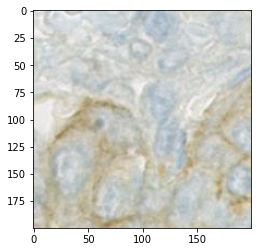

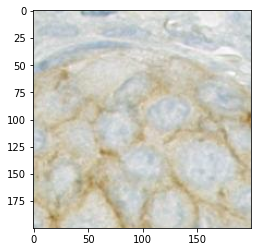

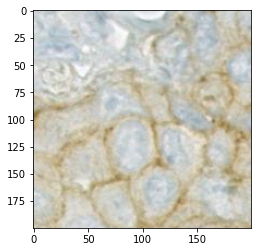

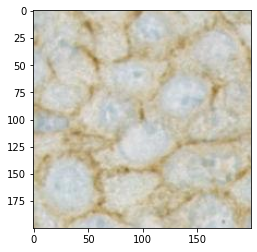

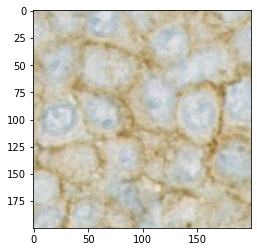

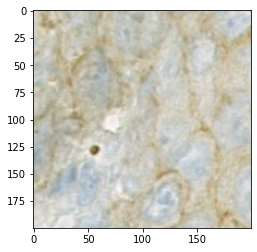

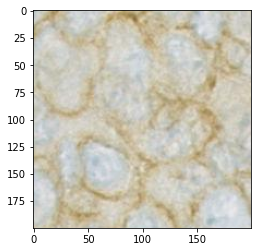

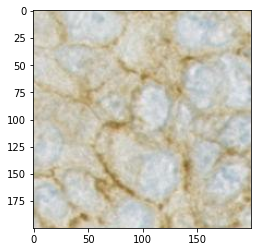

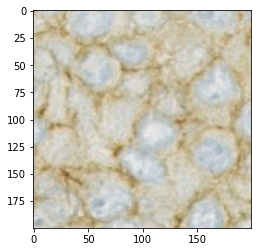

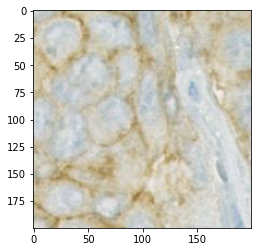

In [13]:
for i in range(10):
    img = skimage.io.imread(input_img_paths[i])
    plt.figure()
    plt.imshow(img)
    plt.show()

In [15]:
img.shape

(200, 200, 3)

# Ejemplo de histograma para una imágen

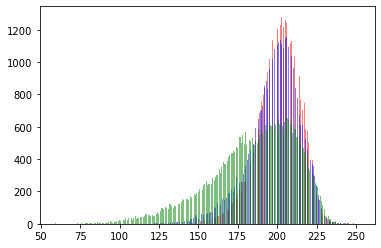

In [18]:
plt.figure()
hist_red = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
hist_red = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'blue', alpha = 0.5)
hist_red = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'green', alpha = 0.5)
plt.show()

Se podría generar histogramas por clase (1+,2+,3+) 

# Filtros de detección de bordes
***
- Se pueden aplicar diversos filtros de bordes para mostrar que segmentar HER2 no es tan simple como detectar bordes
- Revisar: https://scikit-image.org/docs/dev/auto_examples/edges/plot_edge_filter.html


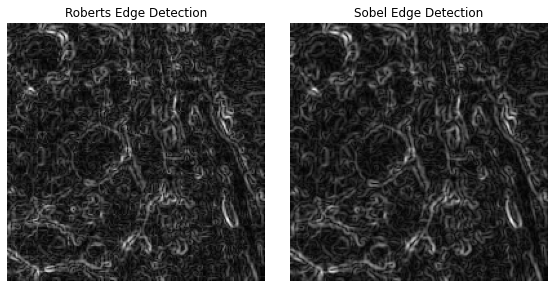

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage.util import compare_images


image = skimage.color.rgb2gray(img)
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

# Nuevos espacios de colores
***
- Se puede visualizar la imagen en diferentes espacios de colores
- Revisar https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_ihc_color_separation.html

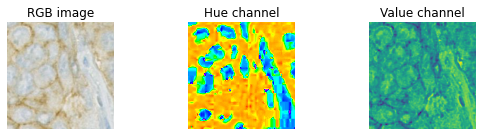

In [22]:
from skimage.color import rgb2hsv

rgb_img = img
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()